In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
##easy straight forward function to calculate charge changing cross section without any corrections
def cccs(filename,target_thickness):
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
    df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))

        cc_2198 = factor_2198*(-math.log(dz_2198))
        cc_1086 = factor_1086*(-math.log(dz_1086))
        cc_54 = factor_54*(-math.log(dz_54))
        cc_2198_val.append(cc_2198)
        cc_1086_val.append(cc_1086)
        cc_54_val.append(cc_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val
    
def cccs_loop(filename,target_thickness):
    column_names = ["datatype","targettype","RunID","energy","incoming ions"]
    for i in range(40):
        column_names.append(f"surv_ion_{i}")
    print(column_names)
    df = pd.read_csv(filename,sep='\t',names=column_names)
    for i in range(40):
        df[f"d_survived_{i}"] = 1-df[f"surv_ion_{i}"]/df["incoming ions"]
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        loop_2198 = []
        loop_1086 = []
        loop_54 = []
        for i in range(40):
            dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            cc_2198 = factor_2198*(-math.log(dz_2198))
            cc_1086 = factor_1086*(-math.log(dz_1086))
            cc_54 = factor_54*(-math.log(dz_54))
            loop_2198.append(cc_2198)
            loop_1086.append(cc_1086)
            loop_54.append(cc_54)
        cc_2198_val.append(loop_2198)
        cc_1086_val.append(loop_1086)
        cc_54_val.append(loop_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val        
    
    
def stat_errors(filename,target_thickness):
    targettype = None
    factor = None
    n_t = None
    delta_n_t = None
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    if (target_thickness == "thin"):
        targettype = "c_54"
        factor = (1./T_54)*(pow(10,27))
        n_t = T_54
        delta_n_t = 0.000648
    if (target_thickness == "medium"):
        targettype = "c_1086"
        n_t = T_1086
        delta_n_t = 0.002620
        factor = (1./T_1086)*(pow(10,27))
    if (target_thickness == "thick"):
        targettype = "c_2198"
        n_t = T_1086
        delta_n_t = 0.000322
        factor = (1./T_54)*(pow(10,27))
        
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
    df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
    
    error_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        dz = (1-float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        cc = factor*(-math.log(dz))
        
        r_survived_target = 1-float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_survived']) 
        r_survived_empty = 1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived'])
        n_i_t = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['incoming ions'])
        n_i_e = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['incoming ions'])
        target_error = pow(cc*delta_n_t,2)
        print(target_error)
        print(cc)
        print("survived target\t",r_survived_target)
        counting_error = (pow(10,54))*(1./(n_t*n_t))*((1-r_survived_target)/(r_survived_target*n_i_t)+(1-r_survived_empty)/(r_survived_empty*n_i_e))
        print(counting_error)
        total_error = math.sqrt(target_error + counting_error)
        print("total error\t",total_error)
        error_val.append(total_error)
    return error_val

In [3]:
file_gauss2d_border_3_5_sigma = 'numbers/comb_gauss2d_border.txt'
file_gauss2d_border_loop = 'numbers/comb_loop_gauss2d_border.txt'
file_gauss2d_no_border_3_5_sigma = 'numbers/comb_gauss2d_no_border.txt'


cccs_border_3_5_thin = cccs(file_gauss2d_border_3_5_sigma,"thin")
cccs_border_3_5_medium = cccs(file_gauss2d_border_3_5_sigma,"medium")
cccs_border_3_5_thick = cccs(file_gauss2d_border_3_5_sigma,"thick")

cccs_no_border_3_5_thin = cccs(file_gauss2d_no_border_3_5_sigma,"thin")
cccs_no_border_3_5_medium = cccs(file_gauss2d_no_border_3_5_sigma,"medium")
cccs_no_border_3_5_thick = cccs(file_gauss2d_no_border_3_5_sigma,"thick")

tick_target_cccs = cccs_loop(file_gauss2d_border_loop,"thick")
medium_target_cccs = cccs_loop(file_gauss2d_border_loop,"medium")
thin_target_cccs = cccs_loop(file_gauss2d_border_loop,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()

#file_gauss2d_no_border_3_5_sigma = 


/tmp/ipykernel_43058/1476051174.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

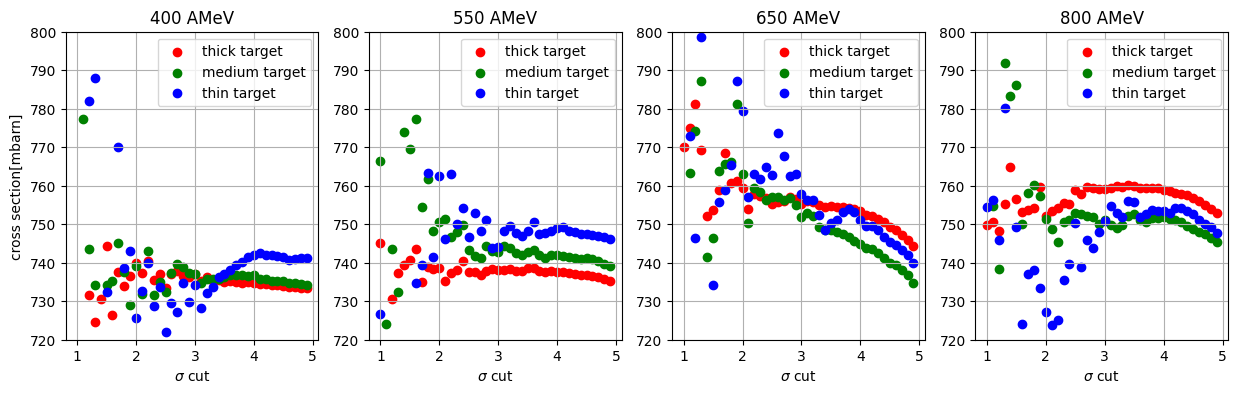

In [4]:
fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.savefig('cccs_vs_sigma_cut.png')

## plot now charge changing cross section with and without border using 2d gaussian fit

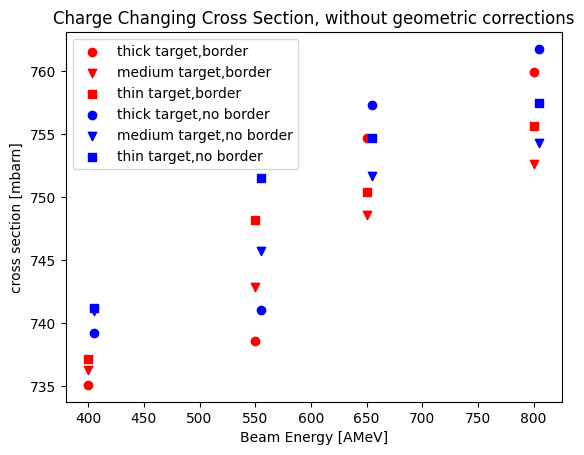

In [5]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,border",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,border",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,border",color='red',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_no_border_3_5_thick,label="thick target,no border",color='blue',marker="o")
ax.scatter(energy,cccs_no_border_3_5_medium,label="medium target,no border",color='blue',marker="v")
ax.scatter(energy,cccs_no_border_3_5_thin,label="thin target,no border",color='blue',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.set_title("Charge Changing Cross Section, without geometric corrections")
plt.savefig('cccs_with_out_border_3_5_sigma.png')

## compare different cut methods: 2d gaussian vs diagonal (with borders)

/tmp/ipykernel_43058/1476051174.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

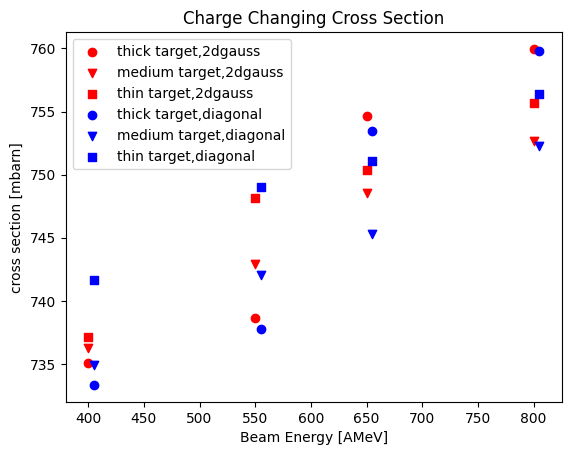

In [6]:
##diagonal cut method
filename_diagonal_3_5_borders = 'numbers/comb_diag_with_border_3_5.txt'
diag_cccs_border_3_5_thin = cccs(filename_diagonal_3_5_borders,"thin")
diag_cccs_border_3_5_medium = cccs(filename_diagonal_3_5_borders,"medium")
diag_cccs_border_3_5_thick = cccs(filename_diagonal_3_5_borders,"thick")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,2dgauss",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,2dgauss",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,2dgauss",color='red',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,diag_cccs_border_3_5_thick,label="thick target,diagonal",color='blue',marker="o")
ax.scatter(energy,diag_cccs_border_3_5_medium,label="medium target,diagonal",color='blue',marker="v")
ax.scatter(energy,diag_cccs_border_3_5_thin,label="thin target,diagonal",color='blue',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.set_title("Charge Changing Cross Section")
plt.savefig('cccs_gauss_diag_comp_3_5_sigma.png')

## analysis on the sigma cut when using diagonal method

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

Text(0.5, 0.98, 'Analysis of sigma cut for diagonal selection method')

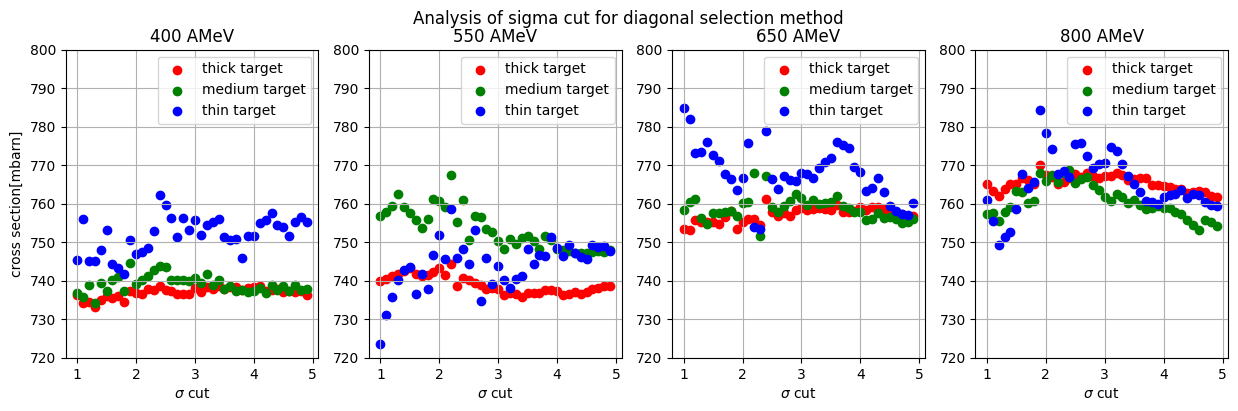

In [7]:
filename_diagonal_3_5_borders_loop = 'numbers/comb_loop_diag_with_border.txt'


tick_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"thick")
medium_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"medium")
thin_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for diagonal selection method")
#plt.savefig('cccs_vs_sigma_cut.png')

## using different combinations of anodes

## leaving out first and last anode

/tmp/ipykernel_43058/1476051174.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

[734.8831424567892, 749.0337484634641, 749.4862195405082, 750.7357675545444]
[735.9096862317114, 742.6836174534235, 746.6495132756809, 750.9029434241093]
[735.4023672687659, 738.3501183793855, 753.9176887415273, 759.1688977064233]
[737.174483047875, 748.1748819584224, 750.3901723987364, 755.6683623477053]
[736.2433733064078, 742.8931290898332, 748.5510821602252, 752.6395243205427]
[735.0797827297906, 738.6094229725691, 754.6782815937042, 759.9663939933411]


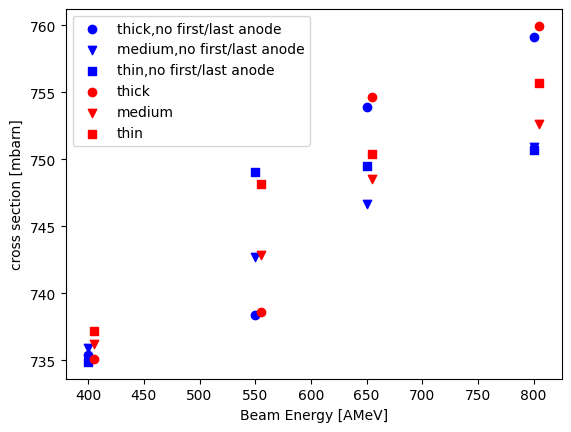

In [8]:
file_no_first_last_gaus2d_border_35 = "numbers/comb_justnotlastfirstanode_gauss2d_border.txt"
cccs_border_3_5_thin_no_first_last = cccs(file_no_first_last_gaus2d_border_35,"thin")
cccs_border_3_5_medium_no_first_last = cccs(file_no_first_last_gaus2d_border_35,"medium")
cccs_border_3_5_thick_no_first_last = cccs(file_no_first_last_gaus2d_border_35,"thick")

file_gauss2d_border_3_5_sigma = 'comb_gauss2d_border.txt'


cccs_border_3_5_thin = cccs(file_gauss2d_border_3_5_sigma,"thin")
cccs_border_3_5_medium = cccs(file_gauss2d_border_3_5_sigma,"medium")
cccs_border_3_5_thick = cccs(file_gauss2d_border_3_5_sigma,"thick")


print(cccs_border_3_5_thin_no_first_last)
print(cccs_border_3_5_medium_no_first_last)
print(cccs_border_3_5_thick_no_first_last)

print(cccs_border_3_5_thin)
print(cccs_border_3_5_medium)
print(cccs_border_3_5_thick)

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick_no_first_last,label="thick,no first/last anode",color='blue',marker="o")
ax.scatter(energy,cccs_border_3_5_medium_no_first_last,label="medium,no first/last anode",color='blue',marker="v")
ax.scatter(energy,cccs_border_3_5_thin_no_first_last,label="thin,no first/last anode",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
plt.savefig('cccs_comp_all_anodes_no_first_last.png')




### using anode 5-8 and 9-12

In [9]:
file_gauss2d_5_8_9_12_border = "numbers/comb_anode_5_8_9_12_gauss2d_border.txt"

middle_anodes_cccs_border_3_5_thin = cccs(file_gauss2d_5_8_9_12_border,"thin")
middle_anodes_cccs_border_3_5_medium = cccs(file_gauss2d_5_8_9_12_border,"medium")
middle_anodes_cccs_border_3_5_thick = cccs(file_gauss2d_5_8_9_12_border,"thick")

/tmp/ipykernel_43058/1476051174.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

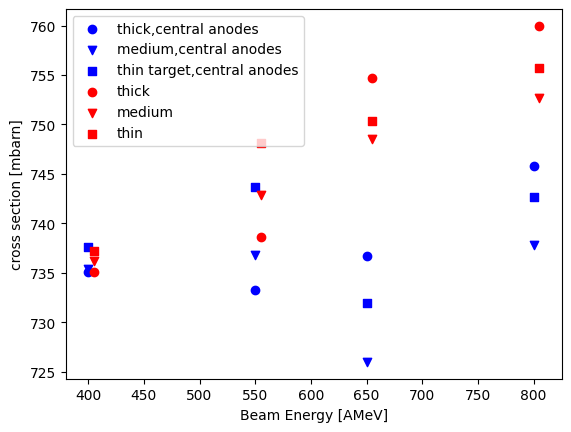

In [10]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,middle_anodes_cccs_border_3_5_thick,label="thick,central anodes",color='blue',marker="o")
ax.scatter(energy,middle_anodes_cccs_border_3_5_medium,label="medium,central anodes",color='blue',marker="v")
ax.scatter(energy,middle_anodes_cccs_border_3_5_thin,label="thin target,central anodes",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
plt.savefig('cccs_comp_central_anodes.png')


### loop over all sigma cuts for anode 5-8 vs 9-12

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

Text(0.5, 0.98, 'Analysis of sigma cut for plot anode 5-8 vs 9-12 method')

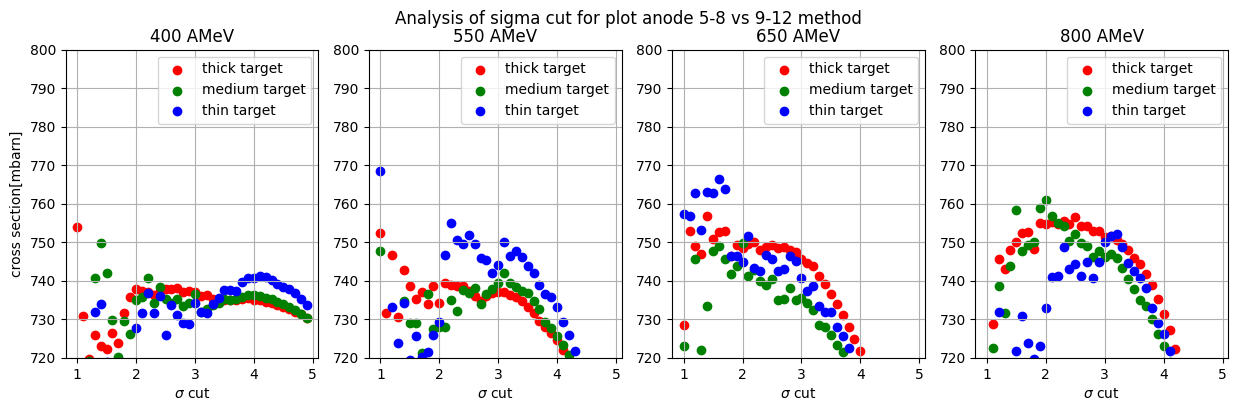

In [11]:
filename = "numbers/comb_loop_anode_5_8_9_12_gauss2d_border.txt"


tick_target_cccs = cccs_loop(filename,"thick")
medium_target_cccs = cccs_loop(filename,"medium")
thin_target_cccs = cccs_loop(filename,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for plot anode 5-8 vs 9-12 method")
#plt.savefig('cccs_vs_sigma_cut.png')

# ---------------------------------------------------------------------------

## using anode 1-4 and 5-8

/tmp/ipykernel_43058/1476051174.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

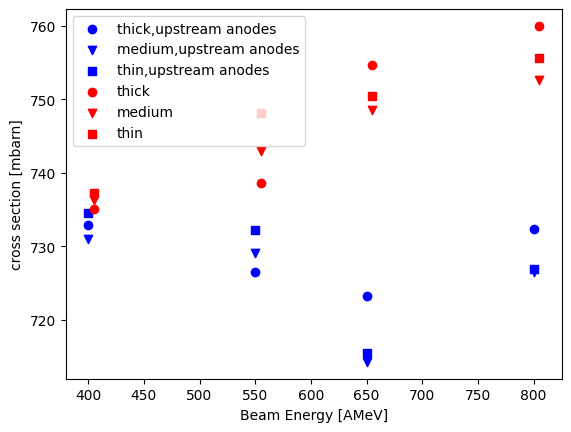

In [12]:
file_gauss2d_1_4_5_8_border = "numbers/comb_anode_1_4_5_8_gauss2d_border.txt"

up_anodes_cccs_border_3_5_thin = cccs(file_gauss2d_1_4_5_8_border,"thin")
up_anodes_cccs_border_3_5_medium = cccs(file_gauss2d_1_4_5_8_border,"medium")
up_anodes_cccs_border_3_5_thick = cccs(file_gauss2d_1_4_5_8_border,"thick")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,up_anodes_cccs_border_3_5_thick,label="thick,upstream anodes",color='blue',marker="o")
ax.scatter(energy,up_anodes_cccs_border_3_5_medium,label="medium,upstream anodes",color='blue',marker="v")
ax.scatter(energy,up_anodes_cccs_border_3_5_thin,label="thin,upstream anodes",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
plt.savefig('cccs_comp_upstream_anodes.png')

### loop over all sigma cuts for anode 1-4 vs 5-8

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

Text(0.5, 0.98, 'Analysis of sigma cut for plot anode 1-4 vs 5-8 method')

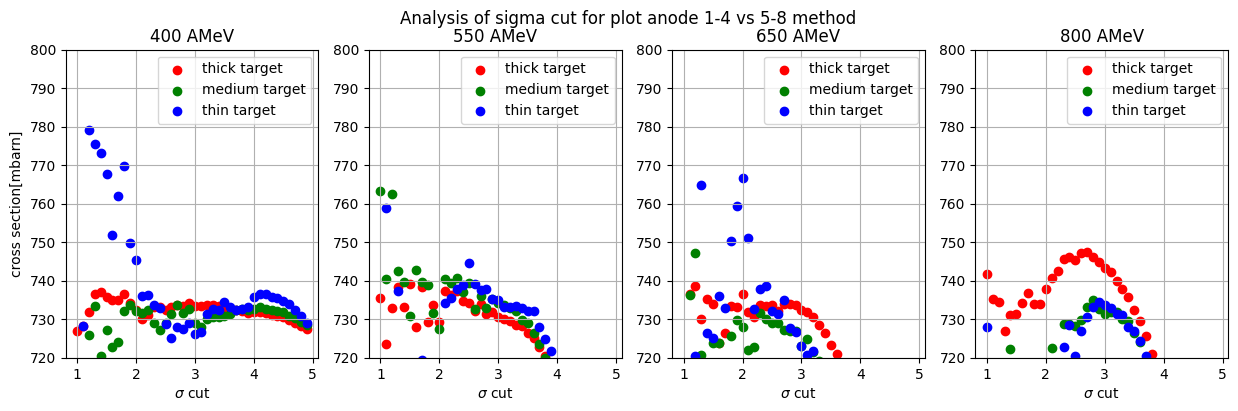

In [13]:
filename = "numbers/comb_loop_anode_1_4_5_8_gauss2d_border.txt"


tick_target_cccs = cccs_loop(filename,"thick")
medium_target_cccs = cccs_loop(filename,"medium")
thin_target_cccs = cccs_loop(filename,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for plot anode 1-4 vs 5-8 method")
#plt.savefig('cccs_vs_sigma_cut.png')

# ---------------------------------------------------------------------------

## using anode 9-12 and 13-16

/tmp/ipykernel_43058/1476051174.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

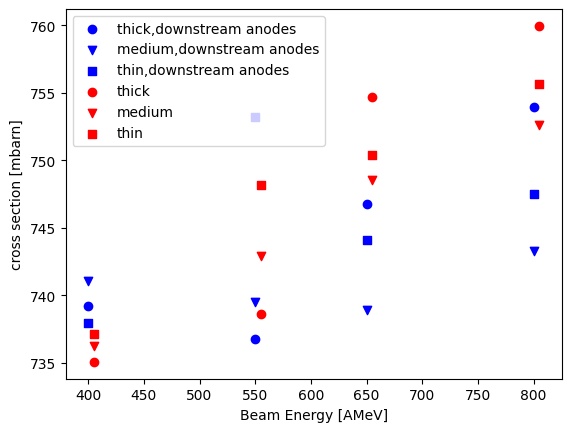

In [14]:
file_gauss2d_9_12_13_16_border = "numbers/comb_anode_9_12_13_16_gauss2d_border.txt"

down_anodes_cccs_border_3_5_thin = cccs(file_gauss2d_9_12_13_16_border,"thin")
down_anodes_cccs_border_3_5_medium = cccs(file_gauss2d_9_12_13_16_border,"medium")
down_anodes_cccs_border_3_5_thick = cccs(file_gauss2d_9_12_13_16_border,"thick")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,down_anodes_cccs_border_3_5_thick,label="thick,downstream anodes",color='blue',marker="o")
ax.scatter(energy,down_anodes_cccs_border_3_5_medium,label="medium,downstream anodes",color='blue',marker="v")
ax.scatter(energy,down_anodes_cccs_border_3_5_thin,label="thin,downstream anodes",color='blue',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_thick,label="thick",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin",color='red',marker="s")
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.legend()
plt.savefig('cccs_comp_downstream_anodes.png')

### loop over all sigma cuts for anode 9-12 vs 13-16

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_43058/1476051174.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_43058/1476051174.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

Text(0.5, 0.98, 'Analysis of sigma cut for plot anode 9-12 vs 13-16 method')

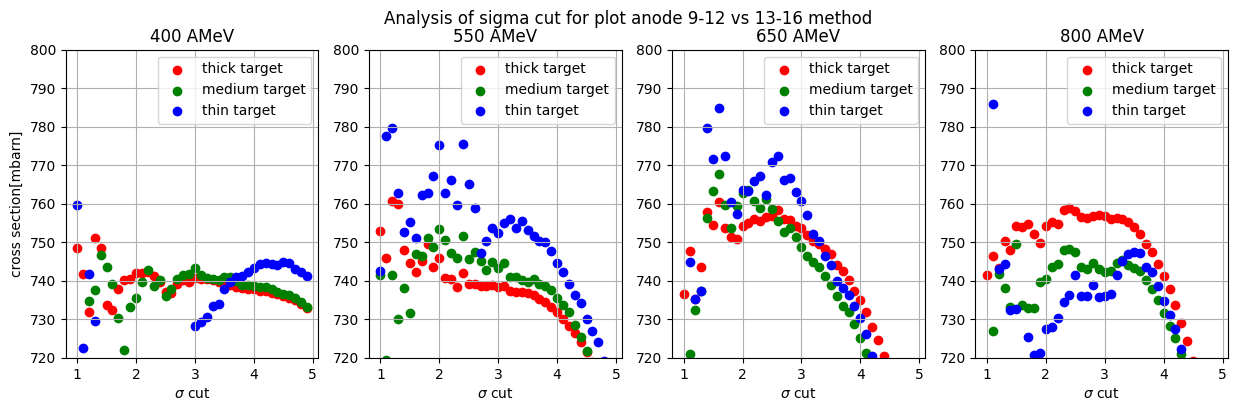

In [15]:
filename = "numbers/comb_loop_anode_9_12_13_16_gauss2d_border.txt"


tick_target_cccs = cccs_loop(filename,"thick")
medium_target_cccs = cccs_loop(filename,"medium")
thin_target_cccs = cccs_loop(filename,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for plot anode 9-12 vs 13-16 method")
#plt.savefig('cccs_vs_sigma_cut.png')

## ------------------------------------------------error meas part--------------------------------

In [16]:
test = 'numbers/comb_gauss2d_border.txt'

In [17]:
err_values_thin = stat_errors(test,"thin")
err_values_medium = stat_errors(test,"medium")
err_values_thick = stat_errors(test,"thick")

0.22818684283492688
737.174483047875
survived target	 0.94511354637289
53.00574390274175
total error	 7.296158629414295
0.23504783717448632
748.1748819584224
survived target	 0.9435236173772839
66.74964843265703
total error	 8.18441789437902
0.2364418163502543
750.3901723987364
survived target	 0.94334962093685
58.99341953515042
total error	 7.696093902201342
0.2397797436896805
755.6683623477053
survived target	 0.9431727312190654
69.13933238972258
total error	 8.32941247228232
3.7208775694407707
736.2433733064078
survived target	 0.9112809894193327
19.353860704341493
total error	 4.803617207249372
3.788395097452836
742.8931290898332
survived target	 0.9096482886573258
26.445237392637406
total error	 5.498511843225423
3.846320483437709
748.5510821602252
survived target	 0.9090671236378742
23.835434589524663
total error	 5.261345367200519
3.8884509510021514
752.6395243205427
survived target	 0.9087671486515417
34.11072782637695
total error	 6.16434739265878
0.9066222663509226
2957.04081

/tmp/ipykernel_43058/1476051174.py:111: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz = (1-float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_43058/1476051174.py:114: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = 1-float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_survived'])
/tmp/ipykernel_43058/1476051174.py:115: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = 1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived'])
/tmp/ipykernel_43058/14

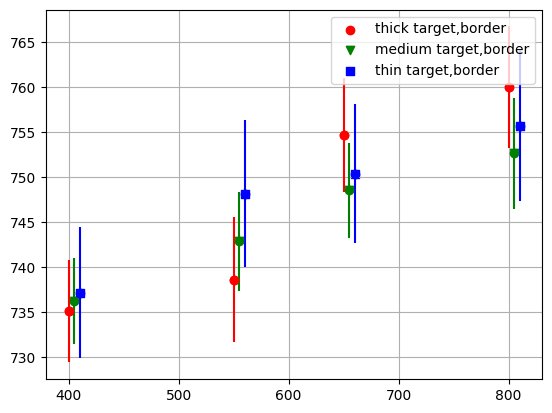

In [18]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,border",color='red',marker="o")
energy = [405,555,655,805]
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,border",color='green',marker="v")
energy = [410,560,660,810]
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,border",color='blue',marker="s")
energy = [400,550,650,800]
ax.errorbar(energy,cccs_border_3_5_thick,yerr=err_values_thick,fmt="o",color="red")
energy = [405,555,655,805]
ax.errorbar(energy,cccs_border_3_5_medium,yerr=err_values_medium,fmt="o",color="green")
energy = [410,560,660,810]
ax.errorbar(energy,cccs_border_3_5_thin,yerr=err_values_thin,fmt="o",color="blue")
ax.grid()
ax.legend()